Import Libraris 

In [152]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
%matplotlib inline 

Read CSV File

In [153]:
df = pd.read_csv("Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

DATA Cleaning 

In [154]:
df = df.drop("CustomerID", axis=1)

In [155]:
df['Genre'] = df["Genre"].replace({'Male': 1, 'Female': 2})
df.head()

C:\Users\Topsystem\AppData\Local\Temp\ipykernel_10112\748636028.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df["Genre"].replace({'Male': 1, 'Female': 2})


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


Feture Selection

In [156]:
featureset = df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

Normalization

In [157]:
from sklearn.preprocessing import MinMaxScaler
x  = featureset.values

In [158]:
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)


Clustring Using Scikit-learn

In [159]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix =euclidean_distances(feature_mtx , feature_mtx)


Z_using_dist_mtx = hierarchy.linkage(dist_matrix , "complete")



C:\Users\Topsystem\AppData\Local\Temp\ipykernel_10112\1656840884.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_mtx = hierarchy.linkage(dist_matrix , "complete")


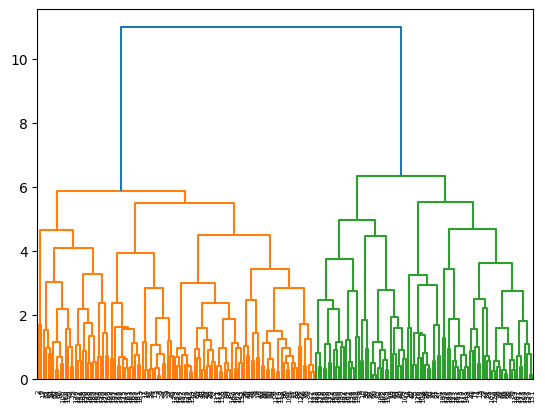

In [160]:
dendro = hierarchy.dendrogram(Z_using_dist_mtx)

Agglomerative

In [161]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\Users\Topsystem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 4, 1, 0, 1, 2, 0, 4, 1,
       3, 1, 3, 1, 0, 4, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 3, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 2, 1, 3, 0, 2, 1,
       0, 3, 1, 0, 2, 0, 3, 3, 2, 1, 0, 4, 0, 0, 2, 4, 2, 0, 0, 4, 0, 0,
       0, 0, 3, 1, 4, 0, 0, 1, 0, 0, 4, 1, 0, 0, 2, 1, 4, 0, 3, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 3, 1, 2, 0, 3, 1, 0, 0, 2, 1, 4, 0, 3, 1, 2, 1, 3, 0,
       3, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2, 1, 2, 1, 3, 0,
       2, 1, 2, 1, 3, 0, 2, 0, 3, 1, 3, 1, 3, 0, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 1])

In [162]:
clusters = agglom.labels_
df['cluster_'] =clusters

2D plot 

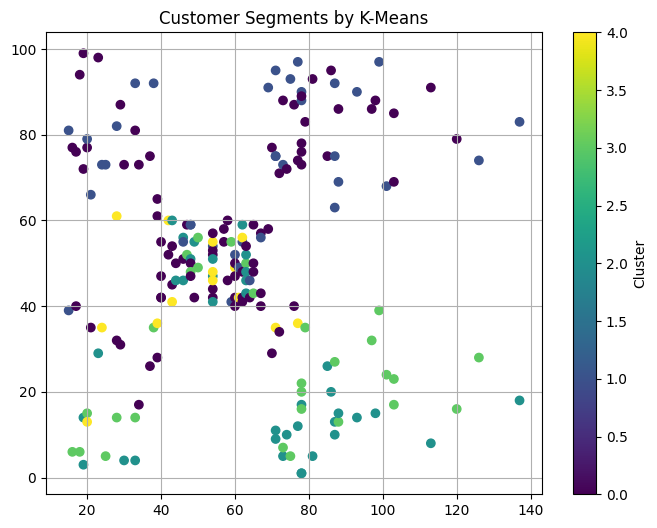

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(featureset.iloc[:, 2], featureset.iloc[:,3 ], c=clusters, cmap='viridis')
#plt.xlabel("Age")
#plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments by K-Means")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

Scipy Clustering

In [164]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]], shape=(200, 200))

In [165]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\Topsystem\AppData\Local\Temp\ipykernel_10112\227076933.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [170]:
from scipy.cluster.hierarchy import fcluster
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 3, 2, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 3,
       1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 3, 3, 1, 1, 2, 2, 2,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 2, 3, 2, 3,
       1, 1, 2, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 1,
       2, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       2, 3], dtype=int32)

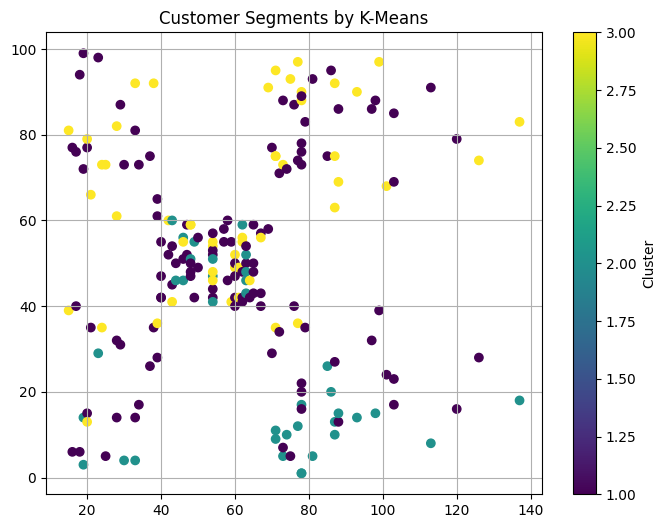

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(featureset.iloc[:, 2], featureset.iloc[:,3 ], c=clusters, cmap='viridis')
#plt.xlabel("Age")
#plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments by K-Means")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [168]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_ = fcluster(Z, k, criterion='maxclust')
clusters_

array([5, 5, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 5, 2, 5, 3, 2, 4, 5,
       1, 5, 1, 5, 2, 4, 2, 2, 3, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 5, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 5, 1, 2, 3, 5,
       2, 1, 5, 2, 3, 2, 1, 1, 3, 5, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 5, 4, 2, 2, 5, 2, 2, 4, 5, 2, 2, 3, 5, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 5, 2, 2, 1, 2, 2, 2, 5, 2, 2, 5, 2, 2, 4, 5, 3, 5, 3, 5,
       2, 2, 3, 2, 1, 5, 3, 2, 1, 5, 2, 2, 3, 5, 4, 2, 1, 5, 3, 5, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 5, 3, 5, 3, 5, 1, 2,
       3, 5, 3, 5, 1, 2, 3, 2, 1, 5, 1, 5, 1, 2, 1, 2, 3, 2, 1, 2, 1, 5,
       3, 5], dtype=int32)

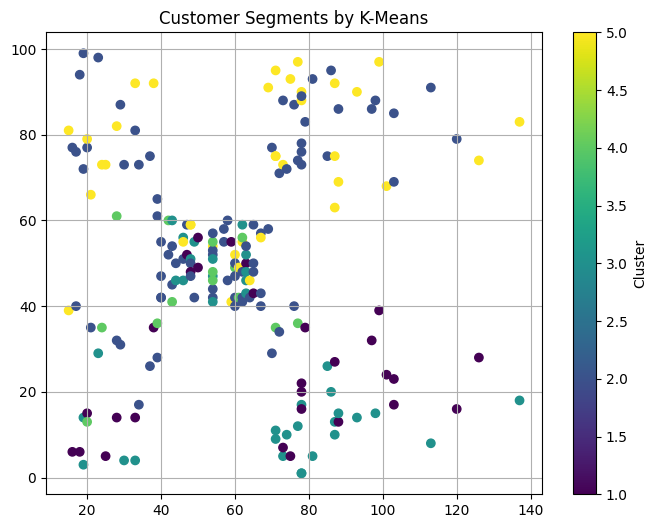

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(featureset.iloc[:, 2], featureset.iloc[:,3 ], c=clusters_, cmap='viridis')
#plt.xlabel("Age")
#plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments by K-Means")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()